In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Change information in this cell for different scenarios. Nothing else needs to be changed. 
filepath = './CollisionScenarioData/100v_100pc/'
filename = '100v_100pc_'
no_vehicles = 100.0 # Remember to change number of vehicles in scenario.

In [3]:
# Loading each run for particular scenario 
run1 = pd.read_csv(filepath+filename+'1.txt', delimiter=",")
run2 = pd.read_csv(filepath+filename+'2.txt', delimiter=",")
run3 = pd.read_csv(filepath+filename+'3.txt', delimiter=",")
run4 = pd.read_csv(filepath+filename+'4.txt', delimiter=",")
run5 = pd.read_csv(filepath+filename+'5.txt', delimiter=",") 

# Initial data format:
run1.head()

,AgentID,xAxisPos,zAxisPos,collisions,topSpeed(mph),currentSpeed(mph),distanceOfTravel(meters),raycastLength,tractionControl,VelocityMagnitude(BETA),VehicleMass,Downforce,date-time
0,-474354,-73.52959,439.981500,0,20.0,0.000000,0.000000,8,0,0.000000,1396,8.401350,08/02/2021 12:52:32
1,-465642,-76.02306,-19.898680,0,0.0,0.000000,0.003916,4,0,0.195808,2268,6.336945,08/02/2021 12:52:32
2,-465730,-164.02550,20.137120,0,10.0,0.438022,0.003916,2,0,0.195808,7485,6.154612,08/02/2021 12:52:32
3,-465818,-74.03391,-9.919459,0,0.0,0.000000,0.003916,6,0,0.195808,7413,4.717373,08/02/2021 12:52:32
4,-465906,103.95220,310.026000,0,20.0,0.438022,0.003916,7,0,0.195808,5389,6.322041,08/02/2021 12:52:32


In [4]:
# Getting data into a more useful format:
# - Change date-time into run time in seconds

datetime1_str = run1['date-time']
datetime1_rpt = pd.to_datetime(datetime1_str) # Convert string to date-time object
datetime1 = datetime1_rpt.drop_duplicates(keep='last') # One date-time value per step
datetime1_index = datetime1.reset_index(drop=True) # Reset index to start from 0, 1, 2, 3 ...
datetime1_index0 = datetime1_index[0] # Get initial time value
run1_diff = datetime1_index - datetime1_index0 # Find time difference from initial time value
run1_time = run1_diff.dt.total_seconds() # Convert to seconds 

datetime_id = datetime1_str.drop_duplicates(keep='last') # Same as above but keeping string datetime format
run1datetime = datetime_id.reset_index(drop=True)

# Repeating this for the rest of the runs:
def to_seconds(x):
    datetime_str = x['date-time']
    datetime_rpt = pd.to_datetime(datetime_str) 
    datetime = datetime_rpt.drop_duplicates(keep='last') 
    datetime_index = datetime.reset_index(drop=True) 
    
    datetime_id = datetime_str.drop_duplicates(keep='last') 
    datetime_idreset = datetime_id.reset_index(drop=True)
    
    datetime_index0 = datetime_index[0] 
    run_diff = datetime_index - datetime_index0
    run_time = run_diff.dt.total_seconds() 
    return run_time, datetime_idreset

# Gives run data in seconds and in date-time string 
run2_time, run2datetime = to_seconds(run2)
run3_time, run3datetime  = to_seconds(run3)
run4_time, run4datetime  = to_seconds(run4)
run5_time, run5datetime  = to_seconds(run5)
run5_time, run5datetime  = to_seconds(run5)

run1_time.head()

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: date-time, dtype: float64

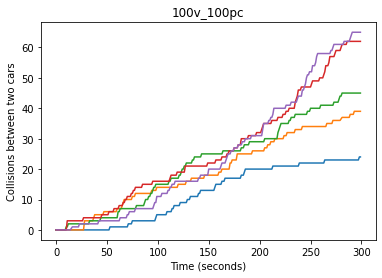

In [5]:
# --------- Collision Analysis ---------
# - For given time step, keep an agent's final collision value
# - Find and plot total number of collisions as function of time for each run 

run1_series = run1.drop_duplicates(subset=['AgentID', 'date-time'], keep='last')
run1_collisions = run1_series[['collisions', 'date-time']]
run1_Ctotal = run1_collisions.groupby('date-time').sum()/2
plt.plot(run1_time[:300], run1_Ctotal[:300], label='run1')

run2_series = run2.drop_duplicates(subset=['AgentID', 'date-time'], keep='last')
run2_collisions = run2_series[['collisions', 'date-time']]
run2_Ctotal = run2_collisions.groupby('date-time').sum()/2
plt.plot(run2_time[:300], run2_Ctotal[:300], label='run2')

run3_series = run3.drop_duplicates(subset=['AgentID', 'date-time'], keep='last')
run3_collisions = run3_series[['collisions', 'date-time']]
run3_Ctotal = run3_collisions.groupby('date-time').sum()/2
plt.plot(run3_time[:300], run3_Ctotal[:300], label='run3')

run4_series = run4.drop_duplicates(subset=['AgentID', 'date-time'], keep='last')
run4_collisions = run4_series[['collisions', 'date-time']]
run4_Ctotal = run4_collisions.groupby('date-time').sum()/2
plt.plot(run4_time[:300], run4_Ctotal[:300], label='run4')

run5_series = run5.drop_duplicates(subset=['AgentID', 'date-time'], keep='last')
run5_collisions = run5_series[['collisions', 'date-time']]
run5_Ctotal = run5_collisions.groupby('date-time').sum()/2

run5_series = run5.drop_duplicates(subset=['AgentID', 'date-time'], keep='last')
run5_collisions = run5_series[['collisions', 'date-time']]
run5_Ctotal = run5_collisions.groupby('date-time').sum()/2
plt.plot(run5_time[:300], run5_Ctotal[:300], label='run5')
plt.xlabel('Time (seconds)')
plt.ylabel('Collisions between two cars')
plt.title(filename[:-1])
plt.savefig(filename[:-1]+'.png')

In [6]:
# Get final number of collisions for each run (this is necessarily also the max number of collisions.)

run1_final = max(run1_Ctotal['collisions'])
run2_final = max(run2_Ctotal['collisions'])
run3_final = max(run3_Ctotal['collisions'])
run4_final = max(run4_Ctotal['collisions'])
run5_final = max(run5_Ctotal['collisions'])
run5_final = max(run5_Ctotal['collisions'])

ave_final = np.mean([run1_final, run2_final, run3_final, run4_final, run5_final])
norm_ave_final = ave_final/no_vehicles
std = np.std([run1_final, run2_final, run3_final, run4_final, run5_final])/no_vehicles

# The following data was recorded in normalized_average_collisions.ods for each scenario. 
print('average collisions = ', ave_final)
print('normalised average collisions = ', norm_ave_final)
print('standard deviation = ', std)

average collisions =  48.2
normalised average collisions =  0.48200000000000004
standard deviation =  0.1444160655882856


In [7]:
# --------- Speed Analysis ---------
# - For each time step, find the ensemble average speed of all vehicles
# - Take a time series average and standard deviation for final 100 time steps
# - Repeat for all runs

speed_run1 = run1_series[['currentSpeed(mph)', 'date-time']]
avspeed_run1 = speed_run1.groupby('date-time').mean()
ts_ave_r1 = [np.mean(avspeed_run1[200:300]), np.std(speed_run1[200:300])]

speed_run2 = run2_series[['currentSpeed(mph)', 'date-time']]
avspeed_run2 = speed_run2.groupby('date-time').mean()
ts_ave_r2 = [np.mean(avspeed_run2[200:300]), np.std(speed_run2[200:300])]

speed_run3 = run3_series[['currentSpeed(mph)', 'date-time']]
avspeed_run3 = speed_run3.groupby('date-time').mean()
ts_ave_r3 = [np.mean(avspeed_run3[200:300]), np.std(speed_run3[200:300])]

speed_run4 = run4_series[['currentSpeed(mph)', 'date-time']]
avspeed_run4 = speed_run4.groupby('date-time').mean()
ts_ave_r4 = [np.mean(avspeed_run4[200:300]), np.std(speed_run4[200:300])]

speed_run5 = run5_series[['currentSpeed(mph)', 'date-time']]
avspeed_run5 = speed_run5.groupby('date-time').mean()
ts_ave_r5 = [np.mean(avspeed_run5[200:300]), np.std(speed_run5[200:300])]

# Print all time series averages and time series standard deviations
print(ts_ave_r1)
print(ts_ave_r2)
print(ts_ave_r3)
print(ts_ave_r4)
print(ts_ave_r5)

# This information was recorded in flow_measurements2.csv

[currentSpeed(mph)    10.002464
dtype: float64, currentSpeed(mph)    3.10303
dtype: float64]
[currentSpeed(mph)    10.001698
dtype: float64, currentSpeed(mph)    1.778205
dtype: float64]
[currentSpeed(mph)    10.046807
dtype: float64, currentSpeed(mph)    1.581179
dtype: float64]
[currentSpeed(mph)    9.907806
dtype: float64, currentSpeed(mph)    1.683516
dtype: float64]
[currentSpeed(mph)    9.693989
dtype: float64, currentSpeed(mph)    2.371182
dtype: float64]


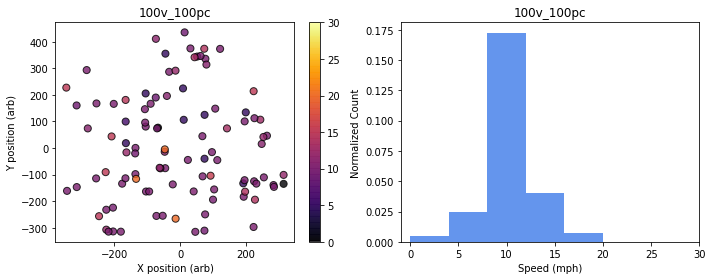

In [8]:
# --------- Speeds at End of Simulation ---------
# - First plot shows location and speeds of vehicles at final time step
# - Second plot shows distribution of speeds for these vehicles at final time step

last_step = run3_series[run3_series['date-time'] == run3datetime[300]]


fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True, figsize=(10,4))
im1 = axs[0].scatter(last_step['xAxisPos'], last_step['zAxisPos'], c=last_step['currentSpeed(mph)'],cmap='inferno',alpha=0.8, s=50, edgecolor='k', vmin=0.0, vmax=30)
fig.colorbar(im1, ax=axs[0])
axs[0].set_xlabel('X position (arb)')
axs[0].set_ylabel('Y position (arb)')
axs[0].set_title(filename[:-1])

axs[1].hist(last_step['currentSpeed(mph)'], bins=5, density=True, color='cornflowerblue')
axs[1].set_title(filename[:-1])
axs[1].set_xlabel('Speed (mph)')
axs[1].set_ylabel('Normalized Count')
axs[1].set_xlim(-1, 30)
plt.savefig('speed_plots/'+filename[:-1]+'speed_dist.png')

In [9]:
# --------- Speeds at End of Simulation: continued ---------
# - This is essentially to systematically compare the second distribution plot above for all scenarios.
# - The ensemble average of all agents' speeds, and the standard deviations of these, is computed.
# - The number of vehicles whose speed is under 5 mph is also found. 

    
last_step1 = run1_series[run1_series['date-time'] == run1datetime[300]]
last_step2 = run2_series[run2_series['date-time'] == run2datetime[300]]
last_step3 = run3_series[run3_series['date-time'] == run3datetime[300]]
last_step4 = run4_series[run4_series['date-time'] == run4datetime[300]]
last_step5 = run5_series[run5_series['date-time'] == run5datetime[300]]

speed_av1 = np.mean(last_step1['currentSpeed(mph)'])
speed_av2 = np.mean(last_step2['currentSpeed(mph)'])
speed_av3 = np.mean(last_step3['currentSpeed(mph)'])
speed_av4 = np.mean(last_step4['currentSpeed(mph)'])
speed_av5 = np.mean(last_step5['currentSpeed(mph)'])

speed_sd1 = np.std(last_step1['currentSpeed(mph)'])
speed_sd2 = np.std(last_step2['currentSpeed(mph)'])
speed_sd3 = np.std(last_step3['currentSpeed(mph)'])
speed_sd4 = np.std(last_step4['currentSpeed(mph)'])
speed_sd5 = np.std(last_step5['currentSpeed(mph)'])

under5_1 = np.count_nonzero(last_step1['currentSpeed(mph)'] < 5)/no_vehicles
under5_2 = np.count_nonzero(last_step2['currentSpeed(mph)'] < 5)/no_vehicles
under5_3 = np.count_nonzero(last_step3['currentSpeed(mph)'] < 5)/no_vehicles
under5_4 = np.count_nonzero(last_step4['currentSpeed(mph)'] < 5)/no_vehicles
under5_5 = np.count_nonzero(last_step5['currentSpeed(mph)'] < 5)/no_vehicles

print([speed_av1, speed_av2, speed_av3, speed_av4, speed_av5])
print([speed_sd1, speed_sd2, speed_sd3, speed_sd4, speed_sd5])
print([under5_1, under5_2, under5_3, under5_4, under5_5])

speed_av = np.array([speed_av1, speed_av2, speed_av3, speed_av4, speed_av5])
speed_sd = np.array([speed_sd1, speed_sd2, speed_sd3, speed_sd4, speed_sd5])
under5 = np.array([under5_1, under5_2, under5_3, under5_4, under5_5])

# This was saved to make it slightly easier to import into an Excel file for keeping track of data for all runs. 
# (The Excel file should be attached, called speed_analysis.ods)
alldata = np.array([speed_av, speed_sd, under5])
np.savetxt(filename[:-1]+'_speeddata.txt', alldata)

[9.688060447, 9.575007735700002, 10.33247302, 10.15867238, 9.752082710000002]
[3.1701618907359412, 3.524421432683405, 3.1852393216108044, 3.64369376678105, 4.259657267030931]
[0.06, 0.09, 0.03, 0.05, 0.08]


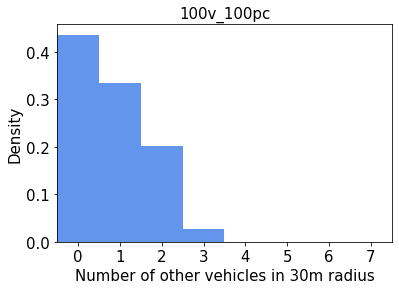

In [10]:
# --------- Collisions: spatial analysis ---------
# Here we look at the local traffic density near collision sites. 
# Since we're interested in whether higher local traffic density contributes to more collisions, 
# we check the local environment near a collision 1 second before the collision takes place. 
# In this case we look at a 30 metre radius around the site of the collision, 
# and count the number of vehicles within that radius. 

from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(1, 1)
nearby_vehicles = []
for runseries in [run1_series, run2_series, run3_series, run4_series, run5_series]:
    # First we clean up any duplicates in the data to only register only novel Agent/collision combinations
    new_collisions0 = runseries.drop_duplicates(subset=['AgentID', 'collisions'], keep='first')
    
    # Remove new collision values of zero
    new_collisions = new_collisions0[new_collisions0['collisions'] != 0 ]

    # The following is to get information of all vehicles 1 second before collision
    # Get a series of date-time values with no duplicayes
    all_datetime = runseries.drop_duplicates('date-time')

    # Find the times at which new collisions occur and find corresponding date-time series index
    match = all_datetime['date-time'].isin(new_collisions['date-time'])
    true_index = np.array(match.index[match].tolist())
    

    for collision in range(len(new_collisions)-1):
        # Get time series index of where collision takes place
        time_index = np.where(all_datetime['date-time'] == new_collisions.iloc[collision]['date-time'])
        
        # Get index of one time step before collision
        prev_time = time_index[0][0] - 1
        
        # Other vehicle information for this previous time index
        other_vehicles = runseries[runseries['date-time'] == all_datetime.iloc[prev_time]['date-time']]
        
        # Calculate distance from collision site
        distancex = other_vehicles['xAxisPos'] - new_collisions.iloc[collision]['xAxisPos']
        distancey = other_vehicles['zAxisPos'] - new_collisions.iloc[collision]['zAxisPos']
        distance = np.sqrt((distancex**2) + (distancey**2))
        
        # Only include vehicles within 30 metres of collision site
        within_radius = distance[distance < 30.0]
        
        nearby = other_vehicles[other_vehicles.index.isin(within_radius.index)]
        nearby_vehicles.append(len(nearby))

all_vehicles = np.array(nearby_vehicles)

nearby_vehicles = all_vehicles - 2 # Only interested in vehicles other than the ones colliding
d = 1
left_of_first_bin = min(nearby_vehicles) - float(d)/2
right_of_last_bin = max(nearby_vehicles) + float(d)/2
plt.hist(nearby_vehicles, bins=np.arange(left_of_first_bin, right_of_last_bin), color='cornflowerblue', density=True)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title(filename[:-1], fontsize=15.0)
plt.xlabel('Number of other vehicles in 30m radius', fontsize=15.0)
plt.ylabel('Density', fontsize=15.0)
plt.xticks(fontsize=15.0)
plt.yticks(fontsize=15.0)
plt.xlim(-0.5, 7.5)
plt.savefig('./localised_density/'+'vehicles_'+filename[:-1]+'.png', bbox_inches='tight')
